In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Social_Network_Ads.csv')

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
X=data.iloc[:,2:4].values
X.shape

(400, 2)

In [5]:
y=data.iloc[:,-1].values
y.shape

(400,)

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)


In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [8]:
X_train=scaler.fit_transform(X_train)
X_train


array([[-0.15880689,  0.13615059],
       [-0.15880689,  2.16462903],
       [ 0.4111169 , -0.51061065],
       [-0.91870528,  0.54772593],
       [ 1.83592638, -0.30482298],
       [-0.44376878, -0.86338951],
       [-0.63374338, -1.06917718],
       [-1.20366717,  0.25374354],
       [ 0.12615501,  1.87064665],
       [-0.25379419, -0.3930177 ],
       [-0.91870528, -0.33422122],
       [-1.10867987, -1.59834546],
       [-0.91870528, -1.12797365],
       [ 0.79106609, -1.3925578 ],
       [-0.44376878, -1.24556661],
       [-0.82371798, -1.24556661],
       [-1.58361637,  0.51832769],
       [-0.06381959, -0.24602651],
       [-0.72873068, -0.6282036 ],
       [ 0.79106609,  0.51832769],
       [-1.58361637, -0.06963708],
       [-1.48862907, -1.53954899],
       [ 0.3161296 ,  0.01855764],
       [-0.34878149,  0.04795588],
       [-0.34878149, -0.80459303],
       [-1.58361637, -1.59834546],
       [ 0.4111169 , -0.15783179],
       [-1.01369258, -0.3930177 ],
       [ 0.6960788 ,

In [9]:
X_test=scaler.transform(X_test)
X_test


array([[-0.25379419,  0.13615059],
       [ 0.88605339, -1.06917718],
       [ 0.5061042 ,  1.72365546],
       [ 0.12615501,  0.07735411],
       [ 0.03116771, -0.33422122],
       [-1.67860366,  0.34193826],
       [ 1.64595178,  1.75305369],
       [-0.53875608,  0.45953121],
       [ 0.98104069,  0.57712416],
       [ 0.4111169 ,  0.9886995 ],
       [-1.10867987,  0.31254002],
       [-1.48862907,  0.31254002],
       [ 0.03116771,  1.22388541],
       [ 2.02590097,  0.3713365 ],
       [ 0.03116771,  1.25328364],
       [-0.06381959, -0.45181417],
       [-1.10867987, -1.12797365],
       [ 0.5061042 ,  1.22388541],
       [-0.63374338, -1.6277437 ],
       [ 0.88605339, -1.33376132],
       [-0.72873068,  0.28314178],
       [ 0.98104069,  1.87064665],
       [-0.34878149, -0.80459303],
       [ 0.3161296 , -0.56940713],
       [ 0.6960788 , -1.12797365],
       [ 1.17101529, -1.0103807 ],
       [-0.25379419, -1.33376132],
       [ 0.2211423 , -0.3930177 ],
       [ 0.03116771,

In [10]:
#k
np.sqrt(X_train.shape[0])

17.88854381999832

In [11]:
k=17


In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=k)

In [13]:
#train model
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

In [14]:
y_pred=knn.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.875

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[45,  4],
       [ 6, 25]], dtype=int64)

In [17]:
#2nd
accuracy=[]
for i in range(1,26):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    accuracy.append(accuracy_score(y_test,knn.predict(X_test)))

In [18]:
accuracy

[0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.875,
 0.8875,
 0.8875,
 0.9,
 0.875,
 0.875,
 0.875,
 0.8875,
 0.875,
 0.8875,
 0.875,
 0.875,
 0.875,
 0.8875,
 0.875,
 0.875,
 0.875,
 0.8875,
 0.8875,
 0.8875]

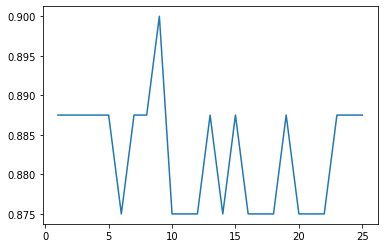

In [19]:
plt.plot(range(1,26),accuracy)

In [20]:
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [21]:
y_pred=knn.predict(X_test)

In [23]:
accuracy_score(y_test,y_pred)

0.875

In [30]:
def predict_output():
    age=int(input("age likh bhai"))
    salary=int(input("salary kitna milta hae"))
    
    
    X_new= np.array([[age],[salary]]).reshape(1,2)
    X_new=scaler.transform(X_new)
    
    
    if knn.predict(X_new)[0]==0:
        return "nhi khareed paayega"
    else:
        return "khareedlega"


In [31]:
predict_output()

age likh bhai50
salary kitna milta hae150000


'khareedlega'